In [1]:
# import standard ibraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# load dataset

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# drop unnecsaary columns

df=df[["v1","v2"]]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# re arrarnge data

df=df[["v2","v1"]]
df

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [7]:
# rename column names:

df=df.rename(columns={"v2":"text","v1":"target"})
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [8]:
# target column analysis:

df.target.value_counts(normalize=True)*100   # 83 % are not sapm messiges only 13% are spam mails

ham     86.593683
spam    13.406317
Name: target, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

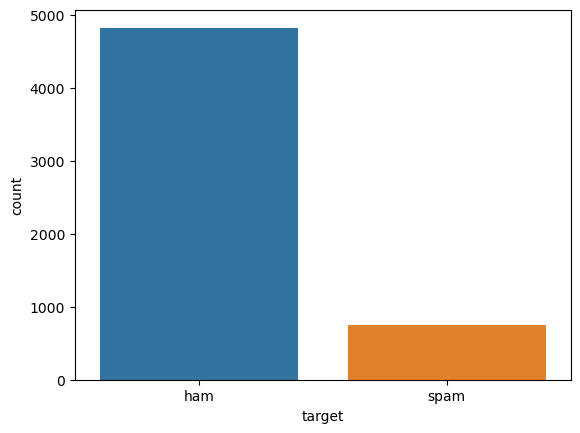

In [9]:
sb.countplot(df.target)

In [10]:
# feature encoding on target column

df["target"]=df.target.replace({"ham":0,"spam":1})
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [11]:
# missing value analysis

df.isnull().sum()   # no missing values

text      0
target    0
dtype: int64

# preprocessing on the text column

#### step  1) covert the text column into lowercase

In [12]:
df["text"]=df.text.str.lower()
df

,text,target
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0
...,...,...
5567,this is the 2nd time we have tried 2 contact u...,1
5568,will ì_ b going to esplanade fr home?,0
5569,"pity, * was in mood for that. so...any other s...",0
5570,the guy did some bitching but i acted like i'd...,0


####  2) removing stop words

In [13]:
# find out the stop words

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=stopwords.words("english")
stopwords  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# compare the stop words and with the text columns and removei t

In [15]:
# define a function to remove stop words

def remove_stopwords(text):
    return " ".join([i for i in text.split() if i not in stopwords])

In [16]:
# apply th function on the text columns

df["text"]=df["text"].apply(lambda x:remove_stopwords(x))
df

,text,target
0,"go jurong point, crazy.. available bugis n gre...",0
1,ok lar... joking wif u oni...,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor... u c already say...,0
4,"nah think goes usf, lives around though",0
...,...,...
5567,2nd time tried 2 contact u. u å£750 pound priz...,1
5568,ì_ b going esplanade fr home?,0
5569,"pity, * mood that. so...any suggestions?",0
5570,guy bitching acted like i'd interested buying ...,0


#### 3) remove all the digits from text

In [17]:
# import re module and define function to remove digits

import re
def remove_nums(text):
    return re.sub("[0-9]+","",text)

In [18]:
# apply thr function on text columns

df["text"]=df["text"].apply(lambda x : remove_nums(x))
df

,text,target
0,"go jurong point, crazy.. available bugis n gre...",0
1,ok lar... joking wif u oni...,0
2,free entry wkly comp win fa cup final tkts st...,1
3,u dun say early hor... u c already say...,0
4,"nah think goes usf, lives around though",0
...,...,...
5567,nd time tried contact u. u å£ pound prize. c...,1
5568,ì_ b going esplanade fr home?,0
5569,"pity, * mood that. so...any suggestions?",0
5570,guy bitching acted like i'd interested buying ...,0


####  4) remove all the url

In [19]:
# import re module and define functions

import re
def remove_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',"",text)

In [20]:
# apply the function on the text column

df["text"]=df["text"].apply(lambda x:remove_url(x))
df

,text,target
0,"go jurong point, crazy.. available bugis n gre...",0
1,ok lar... joking wif u oni...,0
2,free entry wkly comp win fa cup final tkts st...,1
3,u dun say early hor... u c already say...,0
4,"nah think goes usf, lives around though",0
...,...,...
5567,nd time tried contact u. u å£ pound prize. c...,1
5568,ì_ b going esplanade fr home?,0
5569,"pity, * mood that. so...any suggestions?",0
5570,guy bitching acted like i'd interested buying ...,0


#### step 5) remove and clean repeating words/characters

In [21]:
# import re and define function

import re
def cleaning_dup(text):
    return re.sub(r'(.)1+',r'1',text)

In [22]:
df["text"]=df["text"].apply(lambda x:cleaning_dup(x))
df

,text,target
0,"go jurong point, crazy.. available bugis n gre...",0
1,ok lar... joking wif u oni...,0
2,free entry wkly comp win fa cup final tkts st...,1
3,u dun say early hor... u c already say...,0
4,"nah think goes usf, lives around though",0
...,...,...
5567,nd time tried contact u. u å£ pound prize. c...,1
5568,ì_ b going esplanade fr home?,0
5569,"pity, * mood that. so...any suggestions?",0
5570,guy bitching acted like i'd interested buying ...,0


####  step 6) removing punctuations

In [23]:
# import punctuations from string module

import string
punct=string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# create function using punctuations and apply it on text columns

In [25]:
def remove_punc(text):
    translator=str.maketrans('','',punct)
    return text.translate(translator)

In [26]:
df["text"]=df["text"].apply(lambda x:remove_punc(x))
df

,text,target
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
...,...,...
5567,nd time tried contact u u å£ pound prize cla...,1
5568,ì b going esplanade fr home,0
5569,pity mood that soany suggestions,0
5570,guy bitching acted like id interested buying s...,0


#### step 7 ) lemmatization

In [27]:
# import lemmatizer form the nltk module 

from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
wl

<WordNetLemmatizer>

In [28]:
# create a function on with the help of porter stemmer for lemmatization

def lemmatizer_on_text(df):
    text=[wl.lemmatize(word) for word in df]
    return df

In [39]:
# apply the fucntion

import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')

df["text"]=df["text"].apply(lambda x:lemmatizer_on_text(x))
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,target
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
...,...,...
5567,nd time tried contact u u å£ pound prize cla...,1
5568,ì b going esplanade fr home,0
5569,pity mood that soany suggestions,0
5570,guy bitching acted like id interested buying s...,0


#### DIVIDE AND SPLIT DATA INTO TRAIN AND TEST

In [40]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#### feature encoding using countvectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv

CountVectorizer()

In [47]:
cv.fit(x_train["text"])

CountVectorizer()

In [48]:
x_train=cv.transform(x_train["text"])
x_test=cv.transform(x_test["text"])

In [49]:
x_train

<3900x6890 sparse matrix of type '<class 'numpy.int64'>'
	with 32642 stored elements in Compressed Sparse Row format>

In [50]:
x_test

<1672x6890 sparse matrix of type '<class 'numpy.int64'>'
	with 12318 stored elements in Compressed Sparse Row format>

####  appply logisitc regression for prediction

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# check the accuray:

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9778708133971292